# **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_CUDNN_USE_AUTOTUNE'] = '0'
import tensorflow as tf


gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ GPU Detected: {gpus[0].name}")
        print("   Memory Growth: Enabled")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found. Check your installation.")
print(tf.config.list_physical_devices('GPU'))


✅ GPU Detected: /physical_device:GPU:0
   Memory Growth: Enabled
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# import tensorflow as tf
# import sys

# print(f"Python Version: {sys.version}")
# print(f"TensorFlow Version: {tf.__version__}")

# # Ask TensorFlow what CUDA/cuDNN versions it was built for
# build_info = tf.sysconfig.get_build_info()

# print("\n--- Compatibility Check ---")
# print(f"TensorFlow expects CUDA Version:  {build_info.get('cuda_version', 'Unknown')}")
# print(f"TensorFlow expects cuDNN Version: {build_info.get('cudnn_version', 'Unknown')}")

# print(f"\nIs GPU Available? {tf.config.list_physical_devices('GPU')}")

Python Version: 3.12.3 (main, Aug 14 2025, 17:47:21) [GCC 13.3.0]
TensorFlow Version: 2.20.0

--- Compatibility Check ---
TensorFlow expects CUDA Version:  12.5.1
TensorFlow expects cuDNN Version: 9

Is GPU Available? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:

# Define paths
DATA_DIR = Path("data")
TRAIN_CSV = DATA_DIR / "train.csv"
TEST_CSV = DATA_DIR / "test.csv"
TRAIN_IMG_DIR = DATA_DIR / "train"
TEST_IMG_DIR = DATA_DIR / "test"
CLASSES_TXT = DATA_DIR / "classes.txt"

# Load CSV data
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
with open(CLASSES_TXT, 'r') as f:
    classes_list = [line.strip() for line in f.readlines()]

print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")
print(f"Number of classes: {len(classes_list)}")
print(f"\nTrain DataFrame:")
train_df.head()

Training samples: 10911
Test samples: 2728
Number of classes: 100

Train DataFrame:


id  \
0  9bb25bc386d6495b9f9ae35f08e7085d   
1  ecddd57d14c64015b906acde50307a24   
2  50bdd6a608f04f04bb1d88721442386e   
3  4e84f59a9a7e42eda7ba4cd6c65efe38   
4  1fa1f3e8c2c14fe08175bcac63f16b6b   

                                                path               label  
0  train/EASTERN PINE ELFIN/9bb25bc386d6495b9f9ae...  EASTERN PINE ELFIN  
1  train/LARGE MARBLE/ecddd57d14c64015b906acde503...        LARGE MARBLE  
2  train/PAPER KITE/50bdd6a608f04f04bb1d887214423...          PAPER KITE  
3  train/RED POSTMAN/4e84f59a9a7e42eda7ba4cd6c65e...         RED POSTMAN  
4  train/GREEN HAIRSTREAK/1fa1f3e8c2c14fe08175bca...    GREEN HAIRSTREAK

# **DATA CLEANING**


In [4]:
import os
train_df['path'] = train_df['path'].apply(lambda x: os.path.join(DATA_DIR, x))

In [5]:
train_df.head()
train_df.shape

(10911, 3)

In [6]:
train_df = train_df[train_df['path'].apply(os.path.exists)]
train_df.shape

(10796, 3)

# **DATA ANALISIS** and **DATA VISUALIZATION**

In [7]:
classes_list

['ADONIS',
 'AFRICAN GIANT SWALLOWTAIL',
 'AMERICAN SNOOT',
 'AN 88',
 'APPOLLO',
 'ARCIGERA FLOWER MOTH',
 'ATALA',
 'ATLAS MOTH',
 'BANDED ORANGE HELICONIAN',
 'BANDED PEACOCK',
 'BANDED TIGER MOTH',
 'BECKERS WHITE',
 'BIRD CHERRY ERMINE MOTH',
 'BLACK HAIRSTREAK',
 'BLUE MORPHO',
 'BLUE SPOTTED CROW',
 'BROOKES BIRDWING',
 'BROWN ARGUS',
 'BROWN SIPROETA',
 'CABBAGE WHITE',
 'CAIRNS BIRDWING',
 'CHALK HILL BLUE',
 'CHECQUERED SKIPPER',
 'CHESTNUT',
 'CINNABAR MOTH',
 'CLEARWING MOTH',
 'CLEOPATRA',
 'CLODIUS PARNASSIAN',
 'CLOUDED SULPHUR',
 'COMET MOTH',
 'COMMON BANDED AWL',
 'COMMON WOOD-NYMPH',
 'COPPER TAIL',
 'CRECENT',
 'CRIMSON PATCH',
 'DANAID EGGFLY',
 'EASTERN COMA',
 'EASTERN DAPPLE WHITE',
 'EASTERN PINE ELFIN',
 'ELBOWED PIERROT',
 'EMPEROR GUM MOTH',
 'GARDEN TIGER MOTH',
 'GIANT LEOPARD MOTH',
 'GLITTERING SAPPHIRE',
 'GOLD BANDED',
 'GREAT EGGFLY',
 'GREAT JAY',
 'GREEN CELLED CATTLEHEART',
 'GREEN HAIRSTREAK',
 'GREY HAIRSTREAK',
 'HERCULES MOTH',
 'HUMMING BIRD H

In [8]:
for class_name in classes_list:
    print(train_df['label'].value_counts().get(class_name, 0), class_name)

115 ADONIS
90 AFRICAN GIANT SWALLOWTAIL
95 AMERICAN SNOOT
101 AN 88
106 APPOLLO
131 ARCIGERA FLOWER MOTH
123 ATALA
121 ATLAS MOTH
124 BANDED ORANGE HELICONIAN
91 BANDED PEACOCK
120 BANDED TIGER MOTH
94 BECKERS WHITE
122 BIRD CHERRY ERMINE MOTH
110 BLACK HAIRSTREAK
93 BLUE MORPHO
109 BLUE SPOTTED CROW
141 BROOKES BIRDWING
143 BROWN ARGUS
122 BROWN SIPROETA
110 CABBAGE WHITE
103 CAIRNS BIRDWING
125 CHALK HILL BLUE
110 CHECQUERED SKIPPER
112 CHESTNUT
114 CINNABAR MOTH
104 CLEARWING MOTH
108 CLEOPATRA
107 CLODIUS PARNASSIAN
118 CLOUDED SULPHUR
95 COMET MOTH
104 COMMON BANDED AWL
112 COMMON WOOD-NYMPH
116 COPPER TAIL
124 CRECENT
92 CRIMSON PATCH
115 DANAID EGGFLY
115 EASTERN COMA
117 EASTERN DAPPLE WHITE
112 EASTERN PINE ELFIN
96 ELBOWED PIERROT
118 EMPEROR GUM MOTH
105 GARDEN TIGER MOTH
114 GIANT LEOPARD MOTH
110 GLITTERING SAPPHIRE
95 GOLD BANDED
88 GREAT EGGFLY
112 GREAT JAY
105 GREEN CELLED CATTLEHEART
148 GREEN HAIRSTREAK
110 GREY HAIRSTREAK
118 HERCULES MOTH
122 HUMMING BIRD HAWK MOTH

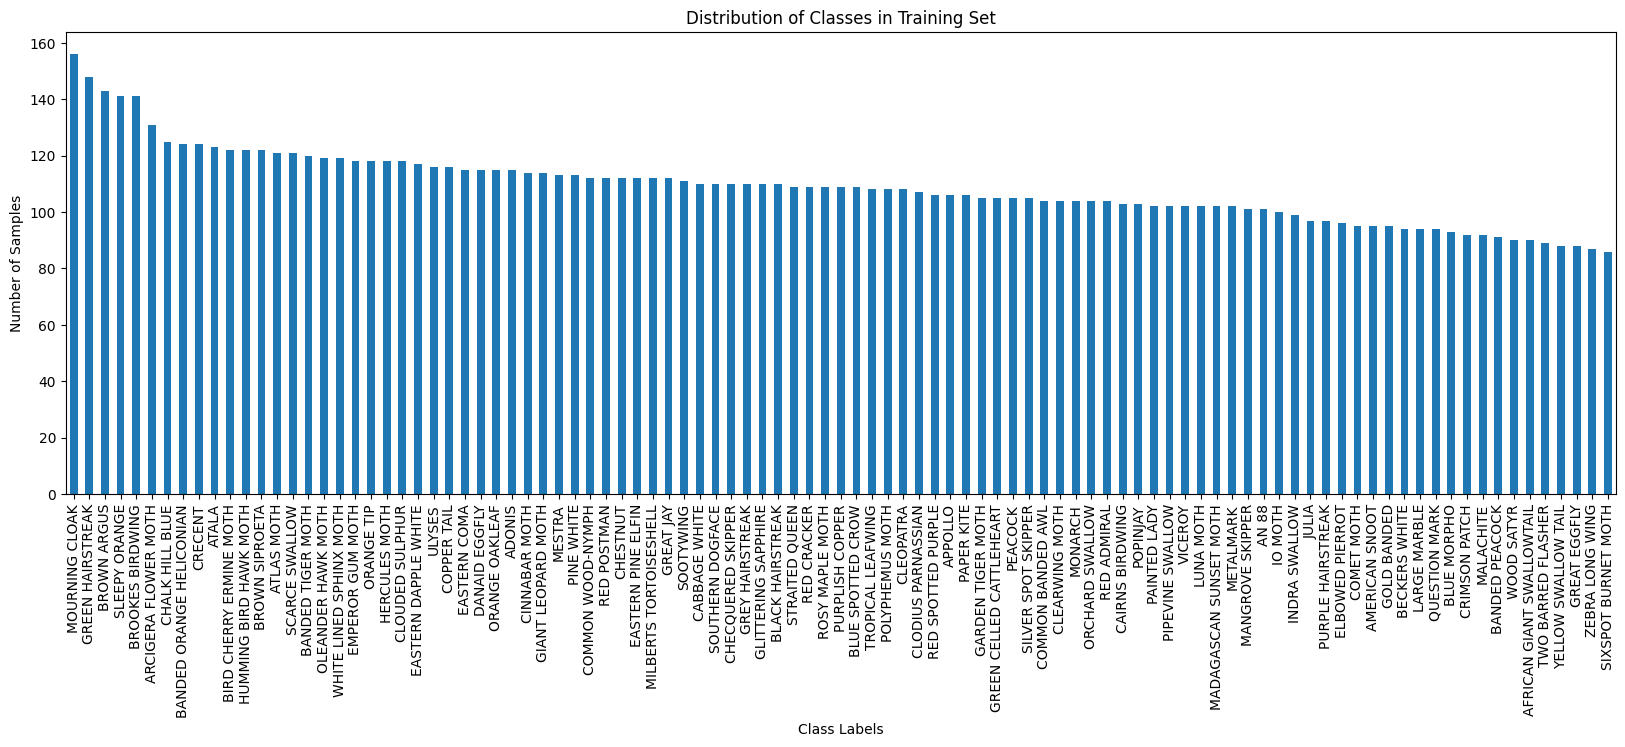

In [9]:
plt.figure(figsize=(20, 6))
train_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

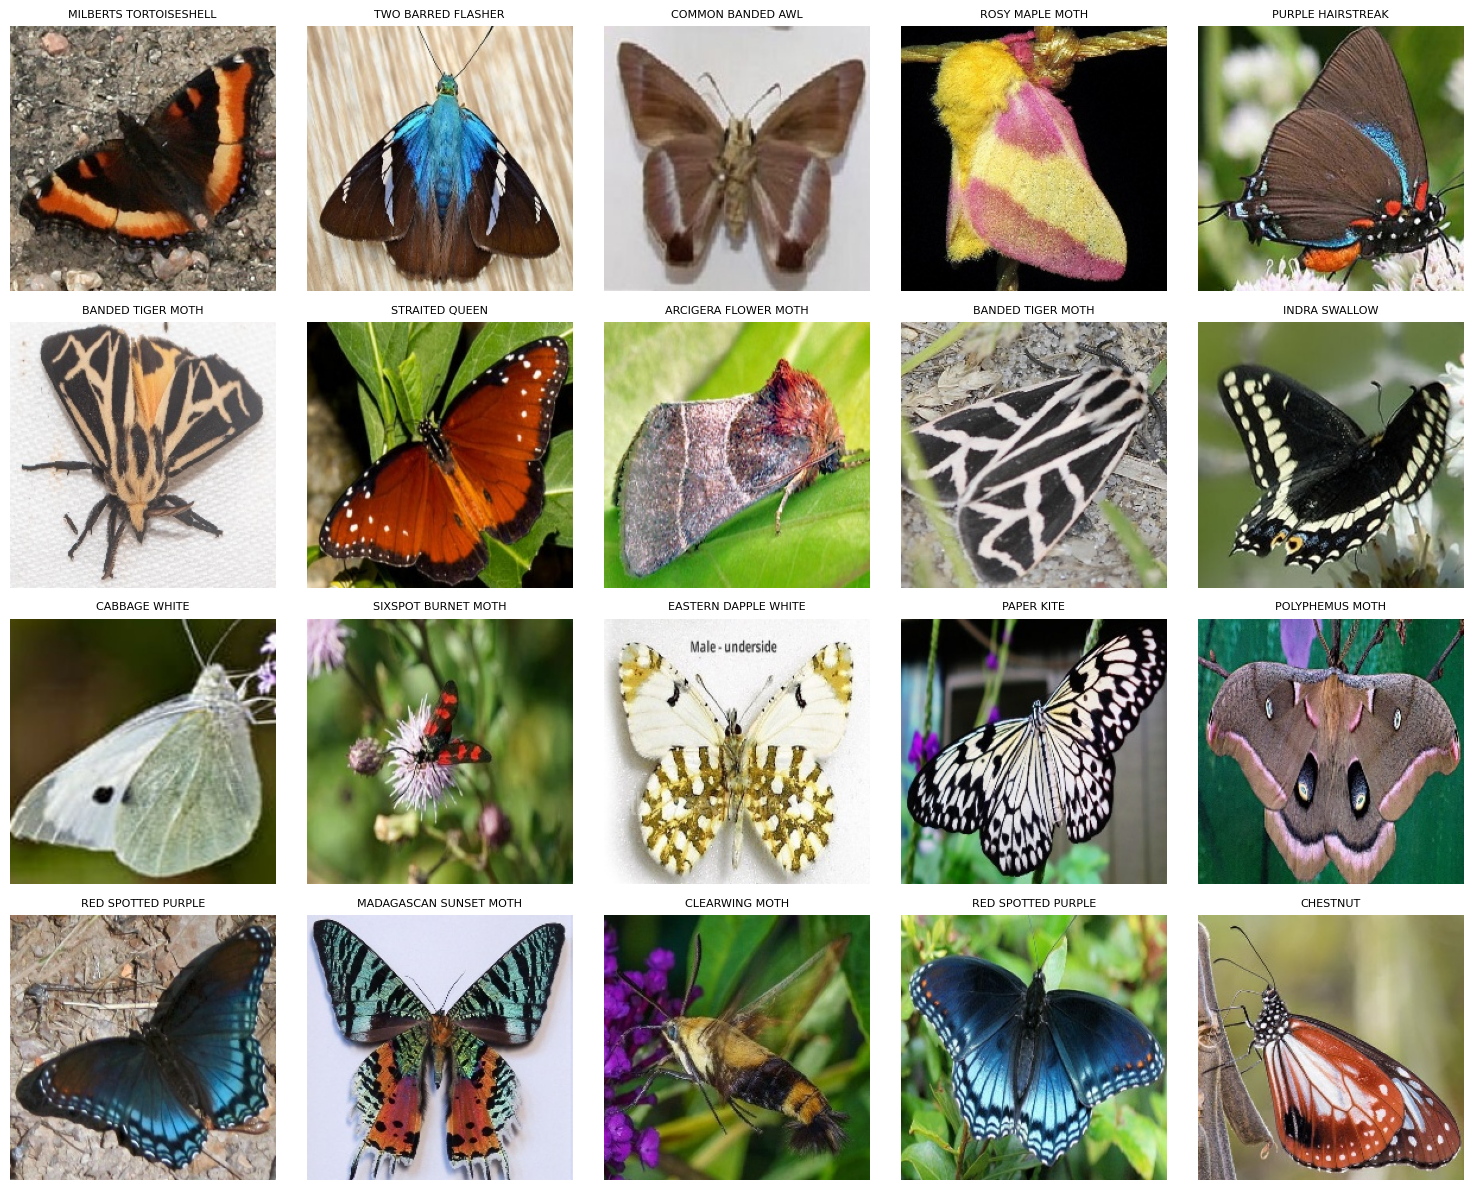

In [10]:
from PIL import Image

fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.flatten()

# Sample random images from the training set
sample_indices = np.random.choice(len(train_df), size=20, replace=False)

for idx, ax in enumerate(axes):
    img_path = train_df.iloc[sample_indices[idx]]['path']
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(train_df.iloc[sample_indices[idx]]['label'], fontsize=8)
    ax.axis('off')
    

plt.tight_layout()
plt.show()

In [11]:
image_sizes = []
for img_path in train_df['path'][:1000]:  
    full_path =  img_path
    with Image.open(full_path) as img:
        image_sizes.append(img.size)

unique_sizes = set(image_sizes)
print(f"Number of unique image sizes: {len(unique_sizes)}")
print(f"Unique sizes found: {unique_sizes}")

from collections import Counter
size_counts = Counter(image_sizes)
print(f"\nSize distribution:")
for size, count in size_counts.most_common(10):
    print(f"{size}: {count} images")

Number of unique image sizes: 1
Unique sizes found: {(224, 224)}

Size distribution:
(224, 224): 1000 images


In [12]:
from sklearn.model_selection import train_test_split 


batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_IMG_DIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

train_ds


Found 10911 files belonging to 100 classes.
Using 8729 files for training.


I0000 00:00:1764192153.488013   32916 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5020 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_IMG_DIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 10911 files belonging to 100 classes.
Using 2182 files for validation.


100%|██████████| 273/273 [00:02<00:00, 127.64it/s]


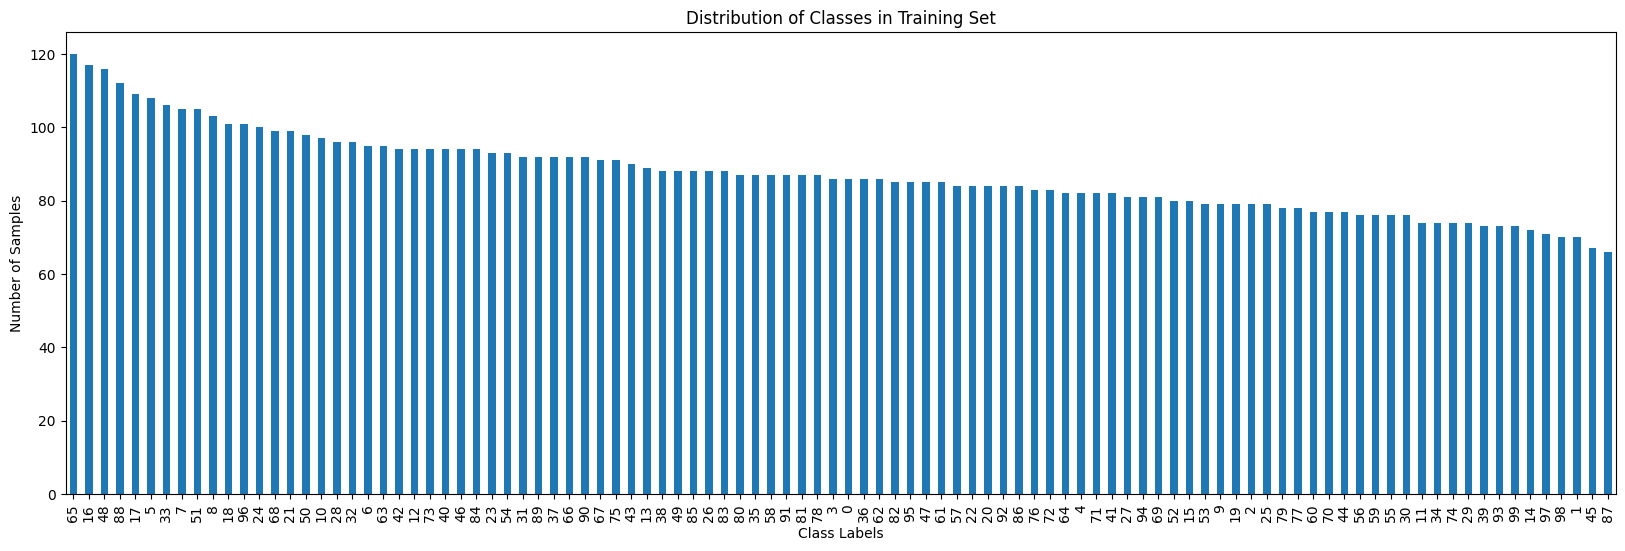

In [14]:
from tqdm import tqdm 
train_labels = []

for images, labels in tqdm(train_ds):
    train_labels.extend(labels.numpy())

series_labels = pd.Series(train_labels)
train_distribution = series_labels.value_counts()
plt.figure(figsize=(20, 6))
train_distribution.plot(kind='bar')
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

100%|██████████| 273/273 [00:02<00:00, 107.14it/s]


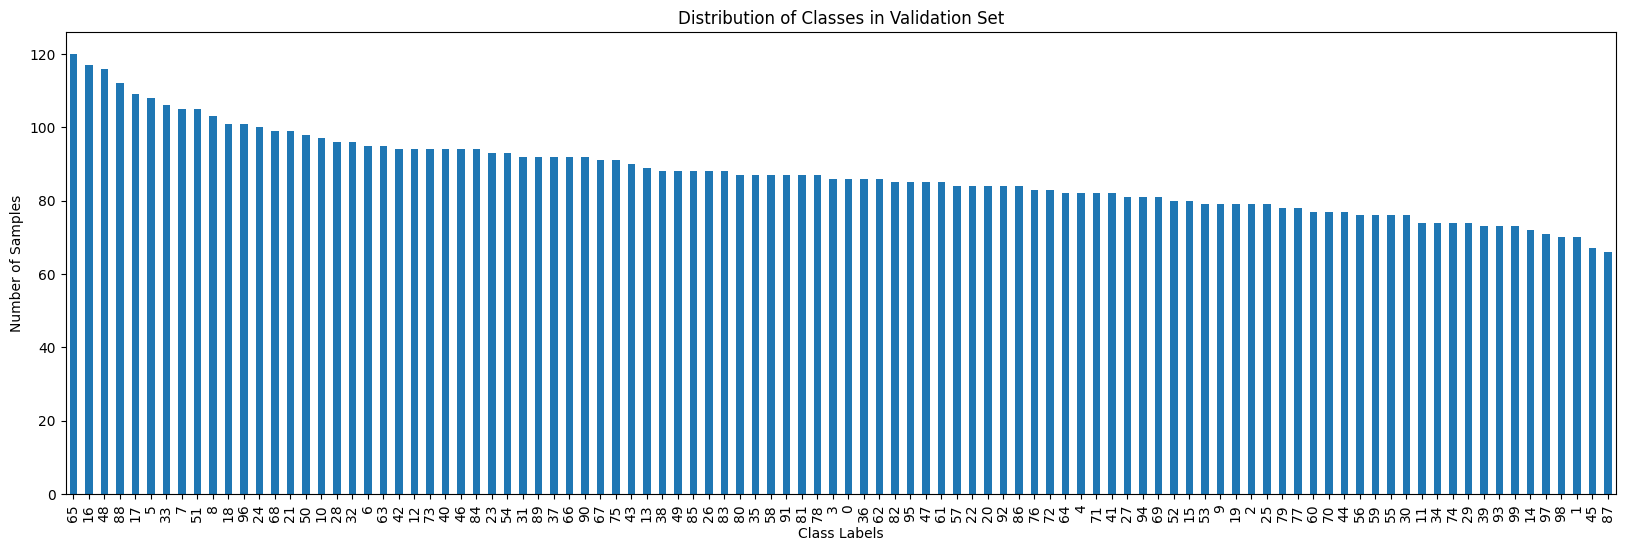

In [15]:
val_labels = []

for images, labels in tqdm(train_ds):
    val_labels.extend(labels.numpy())

series_labels = pd.Series(train_labels)
val_distribution = series_labels.value_counts()
plt.figure(figsize=(20, 6))
val_distribution.plot(kind='bar')
plt.title('Distribution of Classes in Validation Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

In [16]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    
    layers.RandomRotation(0.2),
    
    layers.RandomZoom(0.2),
    
    layers.RandomContrast(0.4),
    
    layers.RandomBrightness([-0.5,0.5])
])

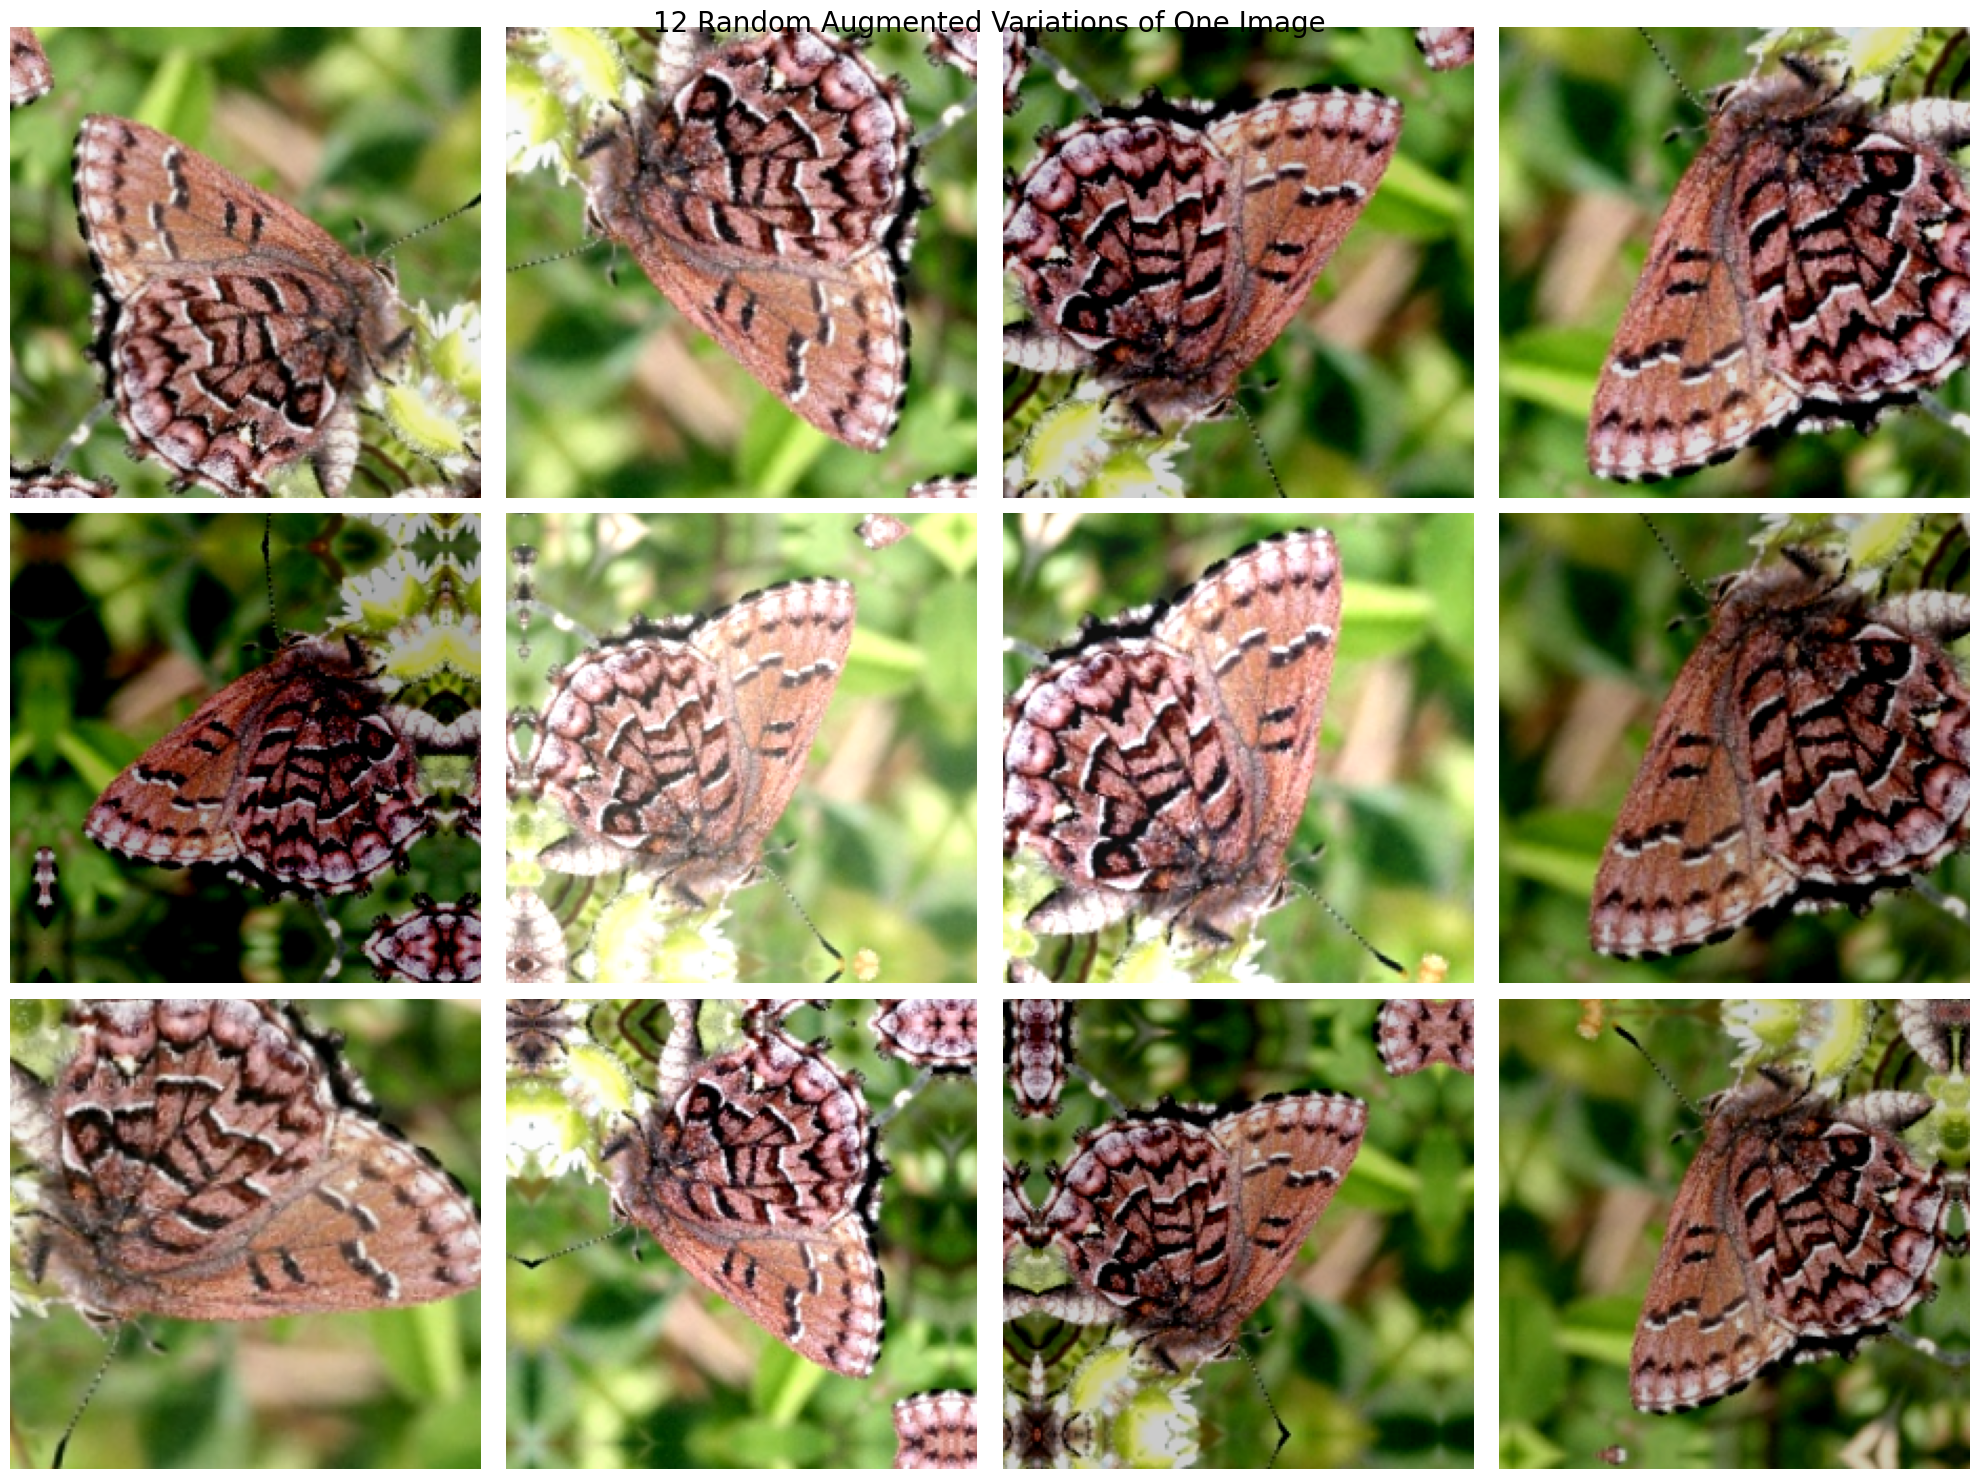

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf

for images, labels in train_ds.take(1):
    original_image = images[0]
    break

plt.figure(figsize=(20, 20)) 

for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    
    aug_img = data_augmentation(tf.expand_dims(original_image, 0), training=True)
    
    plt.imshow(aug_img[0].numpy().astype("uint8"))
    plt.axis("off") 

plt.suptitle("12 Random Augmented Variations of One Image", fontsize=20)
plt.tight_layout()
plt.show()

In [20]:

    
from pretrained_models import get_pretrained_vgg16_model

model = get_pretrained_vgg16_model(input_shape=(224, 224, 3), num_classes=100, augmentation_layer=data_augmentation) 

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    run_eagerly=True
)

model.summary()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('best_butterfly_model.keras', save_best_only=True)
    ]
)

Model: "VGG16_Butterfly_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 224, 224)  │          0 │ sequential[1][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 224, 224)  │          0 │ sequential[1][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 224, 224)  │          0 │ sequential[1][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 224, 224,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 224, 224,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 25088)     │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4096)      │ 102,764,5… │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 4096)      │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 4096)      │ 16,781,312 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 4096)      │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 100)       │    409,700 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 134,670,244 (513.73 MB)

 Trainable params: 119,955,556 (457.59 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10


UnknownError: Exception encountered when calling Conv2D.call().

[1m{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} <unknown cudnn status: 5003>
in external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc(5308): 'status' [Op:Conv2D][0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(32, 224, 224, 3), dtype=float32)